# 使用下载mnist数据集

In [10]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.ToTensor()])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)

# 训练VAE

In [38]:
from VAE import VAE

input_dim = 784
latent_dim = 50
vae = VAE(input_dim, latent_dim)

optimizer = torch.optim.Adam(vae.parameters(), lr=1e-3)

def loss_function(recon_x, x, mu, logvar):
    recon_loss = F.binary_cross_entropy(recon_x, x.view(-1, 784), reduction='sum')
    kl_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return recon_loss + kl_loss

# 训练VAE
num_epochs = 50
for epoch in range(num_epochs):
    vae.train()
    total_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        #data = data.view(-1, 784)
        optimizer.zero_grad()
        recon_batch, mu, logvar = vae(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        total_loss += loss.item()
        optimizer.step()

    print(f'Epoch {epoch + 1}, Loss: {total_loss / len(train_loader.dataset)}')

# 保存
torch.save(vae.state_dict(), 'vae_model.pth')

Epoch 1, Loss: 170.40202928059895
Epoch 2, Loss: 126.36186204427084
Epoch 3, Loss: 116.98825387369791
Epoch 4, Loss: 112.82676046549479
Epoch 5, Loss: 110.54329923502604
Epoch 6, Loss: 109.11787864583333
Epoch 7, Loss: 108.09626538085938
Epoch 8, Loss: 107.40421624348959
Epoch 9, Loss: 106.79694244791666
Epoch 10, Loss: 106.32226979166667
Epoch 11, Loss: 105.93749604492187
Epoch 12, Loss: 105.57232581380208
Epoch 13, Loss: 105.31778110351563
Epoch 14, Loss: 105.00682045898438
Epoch 15, Loss: 104.81273924153646
Epoch 16, Loss: 104.57988678385416
Epoch 17, Loss: 104.41642008463542
Epoch 18, Loss: 104.26234448242188
Epoch 19, Loss: 104.05334484049479
Epoch 20, Loss: 103.93219106445312
Epoch 21, Loss: 103.79021123046876
Epoch 22, Loss: 103.70045100911459
Epoch 23, Loss: 103.56440291341146
Epoch 24, Loss: 103.47072228190105
Epoch 25, Loss: 103.38835537109375
Epoch 26, Loss: 103.30299506835938
Epoch 27, Loss: 103.17373815104166
Epoch 28, Loss: 103.11361027018229
Epoch 29, Loss: 103.027514680

# 加载模型

In [39]:
vae = VAE(input_dim, latent_dim)
vae.load_state_dict(torch.load('vae_model.pth'))
vae.eval()

with torch.no_grad():
    sample = torch.randn(64, latent_dim)
    generated_images = vae.decode(sample)

with torch.no_grad():
    data, _ = next(iter(train_loader))
    data = data.view(-1, 784)
    recon_batch, _, _ = vae(data)

# 展示

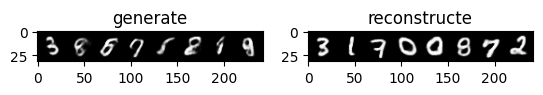

In [42]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2)
axs[0].imshow(torchvision.utils.make_grid(generated_images[30:38].view(8, 1, 28, 28)).permute(1, 2, 0), cmap='gray')
axs[0].set_title('generate')

axs[1].imshow(torchvision.utils.make_grid(recon_batch[8:16].view(8, 1, 28, 28)).permute(1, 2, 0), cmap='gray')
axs[1].set_title('reconstructe')

plt.show()
